In [143]:
# Data Visualization Assignment
# Name: Goutham U R
# Roll No.: IMT2021045
# Team name: Colourblinds

In [144]:
pip install cartopy


In [145]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [146]:
# Load data from the file
file_path = "/content/zonal_23.txt"
try:
    with open(file_path, "r") as file:
        lines_zonal = file.readlines()[6:]  # Ignore the first 6 lines
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
print(lines_zonal)

['  \t0E     \t0.5E   \t1E     \t1.5E   \t2E     \t2.5E   \t3E     \t3.5E   \t4E     \t4.5E   \t5E     \t5.5E   \t6E     \t6.5E   \t7E     \t7.5E   \t8E     \t8.5E   \t9E     \t9.5E   \t10E     \t10.5E   \t11E     \t11.5E   \t12E     \t12.5E   \t13E     \t13.5E   \t14E     \t14.5E   \t15E     \t15.5E   \t16E     \t16.5E   \t17E     \t17.5E   \t18E     \t18.5E   \t19E     \t19.5E   \t20E     \t20.5E   \t21E     \t21.5E   \t22E     \t22.5E   \t23E     \t23.5E   \t24E     \t24.5E   \t25E     \t25.5E   \t26E     \t26.5E   \t27E     \t27.5E   \t28E     \t28.5E   \t29E     \t29.5E   \t30E     \t30.5E   \t31E     \t31.5E   \t32E     \t32.5E   \t33E     \t33.5E   \t34E     \t34.5E   \t35E     \t35.5E   \t36E     \t36.5E   \t37E     \t37.5E   \t38E     \t38.5E   \t39E     \t39.5E   \t40E     \t40.5E   \t41E     \t41.5E   \t42E     \t42.5E   \t43E     \t43.5E   \t44E     \t44.5E   \t45E     \t45.5E   \t46E     \t46.5E   \t47E     \t47.5E   \t48E     \t48.5E   \t49E     \t49.5E   \t50E     \t50.5

In [147]:
# Load data from the file
file_path = "/content/meridonial_23.txt"
try:
    with open(file_path, "r") as file:
        lines_meridonial = file.readlines()[6:]  # Ignore the first 6 lines
except FileNotFoundError:
    print(f"The file {file_path} was not found.")
print(lines_meridonial)

['  \t0E     \t0.5E   \t1E     \t1.5E   \t2E     \t2.5E   \t3E     \t3.5E   \t4E     \t4.5E   \t5E     \t5.5E   \t6E     \t6.5E   \t7E     \t7.5E   \t8E     \t8.5E   \t9E     \t9.5E   \t10E     \t10.5E   \t11E     \t11.5E   \t12E     \t12.5E   \t13E     \t13.5E   \t14E     \t14.5E   \t15E     \t15.5E   \t16E     \t16.5E   \t17E     \t17.5E   \t18E     \t18.5E   \t19E     \t19.5E   \t20E     \t20.5E   \t21E     \t21.5E   \t22E     \t22.5E   \t23E     \t23.5E   \t24E     \t24.5E   \t25E     \t25.5E   \t26E     \t26.5E   \t27E     \t27.5E   \t28E     \t28.5E   \t29E     \t29.5E   \t30E     \t30.5E   \t31E     \t31.5E   \t32E     \t32.5E   \t33E     \t33.5E   \t34E     \t34.5E   \t35E     \t35.5E   \t36E     \t36.5E   \t37E     \t37.5E   \t38E     \t38.5E   \t39E     \t39.5E   \t40E     \t40.5E   \t41E     \t41.5E   \t42E     \t42.5E   \t43E     \t43.5E   \t44E     \t44.5E   \t45E     \t45.5E   \t46E     \t46.5E   \t47E     \t47.5E   \t48E     \t48.5E   \t49E     \t49.5E   \t50E     \t50.5

In [148]:
# Determine the minimum line length (excluding the header row)
min_zonal = min(len(line.strip().split()) for line in lines_zonal)
min_meri = min(len(line.strip().split()) for line in lines_meridonial)
min_len=min(min_zonal,min_meri)
print(min_len)

# Process and clean the data
cleaned_data_zonal = []
for line in lines_zonal:
    parts = line.strip().split()[:min_len]
    cleaned_line = [float(part[:-1]) if part.endswith('N') or part.endswith('E') else (-1) * float(part[:-1]) if part.endswith('S') or part.endswith('W') else float(part) for part in parts]
    cleaned_data_zonal.append(cleaned_line)

# print(cleaned_data_zonal[0:10])

721


In [149]:
cleaned_data_meri = []
for line in lines_meridonial:
    parts = line.strip().split()[:min_len]
    cleaned_line = [float(part[:-1]) if part.endswith('N') or part.endswith('E') else (-1) * float(part[:-1]) if part.endswith('S') or part.endswith('W') else float(part) for part in parts]
    cleaned_data_meri.append(cleaned_line)

# print(cleaned_data_meri[0:10])

In [150]:
data_zonal = np.array(cleaned_data_zonal, dtype=float)
data_meridonial = np.array(cleaned_data_meri, dtype=float)

# For a clear quiver plot make sure that the diffrence is less than 30
lat_start=120
lat_end=140
long_start=120
long_end=140


# # Extract latitudes and longitudes
latitudes = data_zonal[lat_start:lat_end, 0]
longitudes = data_zonal[0, long_start:long_end]
zonal_data = data_zonal[lat_start:lat_end, long_start:long_end]
meridonial_data = data_meridonial[lat_start:lat_end, long_start:long_end]


print(latitudes[0])
print(latitudes[-1])
print(longitudes[0])
print(longitudes[-1])


-30.25
-20.75
60.0
69.5


In [151]:
# Create a mesh grid for latitudes and longitudes
lon, lat = np.meshgrid(longitudes, latitudes)
print(lon.size)

400


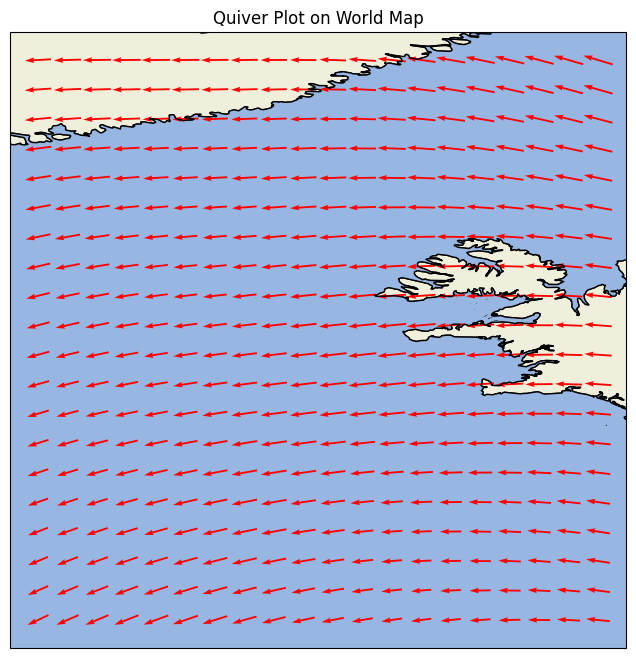

In [152]:
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN, zorder=0)

# Convert lat/lon to map projection coordinates
x, y = ax.projection.transform_points(ccrs.PlateCarree(), lon, lat)[:2]

# Ensure U and V have the correct size by reshaping
U = zonal_data.flatten()
V = meridonial_data.flatten()


# Plot the quiver arrows
ax.quiver(lat, lon, U, V, scale=200, pivot='middle', color='red')

plt.title("Quiver Plot on World Map")
plt.show()

In [153]:
pip install Pillow imageio

In [154]:
from PIL import Image
import imageio

def create_gif(images, output_gif_path, duration=0.5):
    frames = []

    for image_path in images:
        img = Image.open(image_path)
        frames.append(img)

    imageio.mimsave(output_gif_path, frames, duration=duration)

# Example usage:
image_paths = ["/content/p19.png", "/content/p20.png", "/content/p21.png", "/content/p22.png", "/content/p23.png"]
output_gif_path = "output.gif"
create_gif(image_paths, output_gif_path)
